In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#set the options
%matplotlib inline
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',500)


#machine Learning
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,roc_auc_score,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()

#Maths
import math

In [2]:
#!pip install lightgbm

In [3]:
#!pip install -U imbalanced-learn --user

In [4]:
df=pd.read_csv(r'C:\Users\opemi\Downloads\diabetes_binary_health_indicators_BRFSS2015.csv')

In [5]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
df.isnull().sum()

Diabetes_binary    0
HighBP             0
HighChol           0
CholCheck          0
BMI                0
                  ..
DiffWalk           0
Sex                0
Age                0
Education          0
Income             0
Length: 22, dtype: int64

In [8]:
df.dtypes

Diabetes_binary    float64
HighBP             float64
HighChol           float64
CholCheck          float64
BMI                float64
                    ...   
DiffWalk           float64
Sex                float64
Age                float64
Education          float64
Income             float64
Length: 22, dtype: object

In [9]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [10]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [11]:
df=df[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck','BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age','Education',
       'Income']].astype('int64')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,1,0,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,0,0,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,1,0,1,0,3,0,0,0,1,7,5,1


In [12]:
df.dtypes

Diabetes_binary    int64
HighBP             int64
HighChol           int64
CholCheck          int64
BMI                int64
                   ...  
DiffWalk           int64
Sex                int64
Age                int64
Education          int64
Income             int64
Length: 22, dtype: object

In [13]:
R=df.corr()
R

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DiffWalk,0.218344,0.223618,0.144672,0.040585,0.197078,0.122463,0.176567,0.212709,-0.253174,-0.048352,-0.080506,-0.037668,0.007074,0.118447,0.456920,0.233688,0.478417,1.000000,-0.070299,0.204450,-0.192642,-0.320124
Sex,0.031430,0.052207,0.031205,-0.022115,0.042950,0.093662,0.002978,0.086096,0.032482,-0.091175,-0.064765,0.005740,-0.019405,-0.044931,-0.006091,-0.080705,-0.043137,-0.070299,1.000000,-0.027340,0.019480,0.127141
Age,0.177442,0.344452,0.272318,0.090321,-0.036618,0.120641,0.126974,0.221618,-0.092511,0.064547,-0.009771,-0.034578,0.138046,-0.119777,0.152450,-0.092068,0.099130,0.204450,-0.027340,1.000000,-0.101901,-0.127775
Education,-0.124456,-0.141358,-0.070802,0.001510,-0.103932,-0.161955,-0.076009,-0.099600,0.199658,0.110187,0.154329,0.023997,0.122514,-0.100701,-0.284912,-0.101830,-0.155093,-0.192642,0.019480,-0.101901,1.000000,0.449106


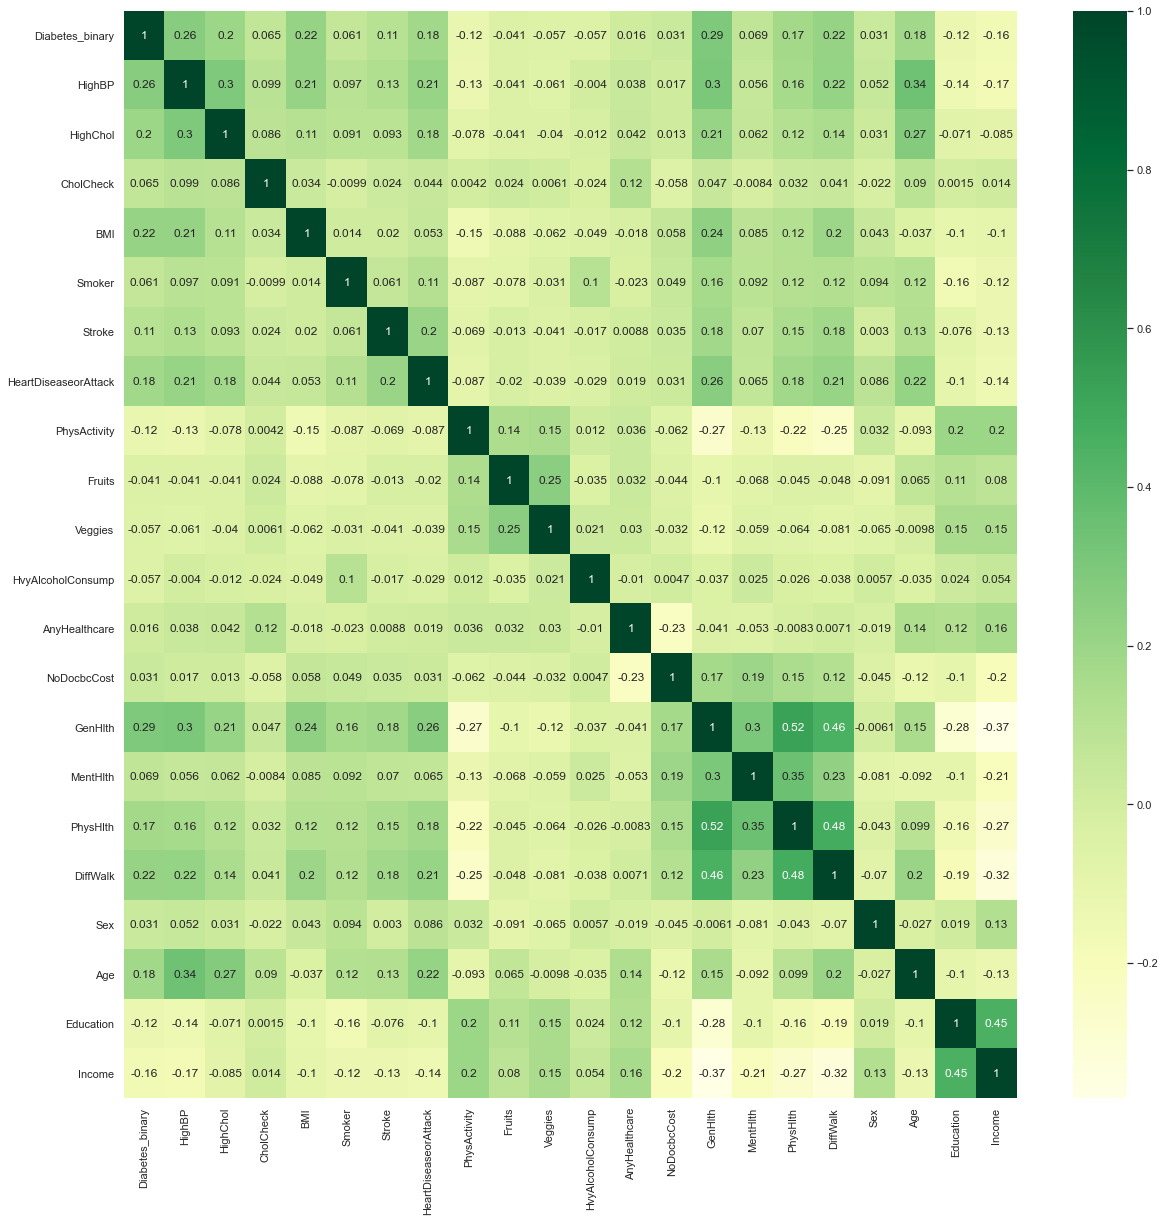

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(R, annot=True,cmap='YlGn')
plt.savefig('heatchart.png')

# Feature Scaling

In [15]:
scaler = StandardScaler()

X= df.drop('Diabetes_binary',axis=1)      #to assign all the features to X

y=df['Diabetes_binary']        #assign the target to y variable

In [16]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X,y)

imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

imp

imp.columns=['Importance']

imp.sort_values(by='Importance', ascending=False)

,Importance
GenHlth,0.054212
CholCheck,0.047879
AnyHealthcare,0.043513
HighBP,0.043083
PhysActivity,0.035094
...,...
Sex,0.009256
Stroke,0.005185
MentHlth,0.003522
HvyAlcoholConsump,0.001790


In [17]:
imp[imp['Importance']>0.03].sort_values(by='Importance',ascending=False)

,Importance
GenHlth,0.054212
CholCheck,0.047879
AnyHealthcare,0.043513
HighBP,0.043083
PhysActivity,0.035094
Veggies,0.034180


In [16]:
X=X[['GenHlth','CholCheck','AnyHealthcare','HighBP','PhysActivity','Veggies']]
X

,GenHlth,CholCheck,AnyHealthcare,HighBP,PhysActivity,Veggies
0,5,1,1,1,0,1
1,3,0,0,0,1,0
2,5,1,1,1,0,0
3,2,1,1,1,1,1
4,2,1,1,1,1,1
...,...,...,...,...,...,...
253675,3,1,1,1,0,1
253676,4,1,1,1,0,0
253677,1,1,1,0,1,0
253678,3,1,1,1,0,1


In [19]:
#scaler.fit(X)

StandardScaler()

In [20]:
#X=scaler.transform(X)              #target was dropped before scaling

In [21]:
#X[0]

array([ 2.32912057,  0.19692156,  0.22686264,  1.15368814, -1.76281393,
        0.48208665])

# Train Test Split
Split the dataset into training and testing set

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Model Building

In [20]:
input_ml_algo='LR'

In [21]:
#Select the algorith according to the input provided
def model_to_use(input_ml_algo):
    if input_ml_algo=='DT':
        model=DecisionTreeClassifier()
    elif input_ml_algo=='RF':
        model=RandomForestClassifier()
    elif input_ml_algo=='XGBC':
        model=XGBClassifier()
    elif input_ml_algo=='LGBMC':
        model=LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [22]:
model=model_to_use('LR')
model

LogisticRegression()

In [23]:
#training the model
model.fit(X_train, y_train)
model

LogisticRegression()

In [24]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]    #the 1 here is us finding the probability of the person being positive. 
#if it was the other way(negative), we use index [0]. 
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted :  [0.051591360226118155, 0.04314032418361164, 0.0869663735627902, 0.20216127166341685, 0.027978926121183172]


# Model Evaluation
Get the evaluation metrics to evaluate the performance of model on testing data


 Accuracy Score : 
  0.8578918322295805

 AUC Score : 
  0.5396719084461777

 Confusion Matrix : 
  [[64243  1276]
 [ 9539  1046]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.87      0.98      0.92     65519
           1       0.45      0.10      0.16     10585

    accuracy                           0.86     76104
   macro avg       0.66      0.54      0.54     76104
weighted avg       0.81      0.86      0.82     76104


 ROC Curve : 
 


C:\Users\opemi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


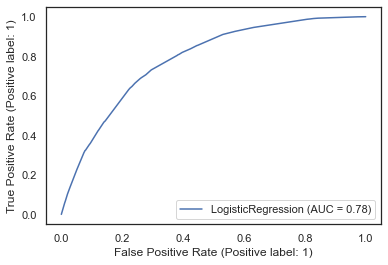

In [25]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

In [29]:
#Trying RandonForest
#model=model_to_use('RF')
#model

RandomForestClassifier()

In [30]:
#training the model
#model.fit(X_train, y_train)
#model

RandomForestClassifier()

In [31]:
#y_pred=model.predict(X_test)

#predict probability for test dataset
#y_pred_prod=model.predict_proba(X_test)
y#_pred_prod=[x[0]for x in y_pred_prod]    #the 0 here is us finding the probability of the person being negative. 
#if it was the other way(positive), we use index [0]. ----- Switched from the first model test
#print('Y predicted : ',y_pred)
#print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted :  [0.9511388804151386, 0.9649889956457681, 0.8892742095128903, 0.7699162900236098, 0.9813423406038734]



 Accuracy Score : 
  0.8609008724902765

 AUC Score : 
  0.5000319739074343

 Confusion Matrix : 
  [[65517     2]
 [10584     1]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.86      1.00      0.93     65519
           1       0.33      0.00      0.00     10585

    accuracy                           0.86     76104
   macro avg       0.60      0.50      0.46     76104
weighted avg       0.79      0.86      0.80     76104


 ROC Curve : 
 


C:\Users\opemi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


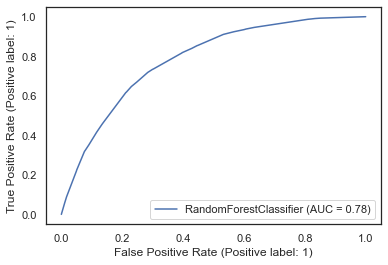

In [32]:
# Evaluation

#def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    #print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    #print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    #print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    #print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    #print('\n ROC Curve : \n ')
    #sns.set_style('white')
    #plot_roc_curve(model,x_test,y_actual)
    #plt.show()
    
#compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

In [60]:
#Trying DecisionTree
#model=model_to_use('LR')
#model

LogisticRegression()

In [61]:
#training the model
#model.fit(X_train, y_train)
#model

LogisticRegression()

In [62]:
#y_pred=model.predict(X_test)

#predict probability for test dataset
#y_pred_prod=model.predict_proba(X_test)
#y_pred_prod=[x[0]for x in y_pred_prod]    #the 0 here is us finding the probability of the person being negative. 
#if it was the other way(positive), we use index [0]. ----- Switched from the first model test
#print('Y predicted : ',y_pred)
#print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted :  [0.9484086428089482, 0.9568596913845856, 0.91303372104621, 0.797838951083855, 0.9720210657170641]


In [63]:
#y_pred=model.predict(X_test)

#predict probability for test dataset
#y_pred_prod=model.predict_proba(X_test)
#y_pred_prod=[x[0]for x in y_pred_prod]    #the 0 here is us finding the probability of the person being negative. 
#if it was the other way(positive), we use index [0]. ----- Switched from the first model test
#print('Y predicted : ',y_pred)
#print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted :  [0.9484086428089482, 0.9568596913845856, 0.91303372104621, 0.797838951083855, 0.9720210657170641]



 Accuracy Score : 
  0.8578918322295805

 AUC Score : 
  0.5396719084461777

 Confusion Matrix : 
  [[64243  1276]
 [ 9539  1046]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.87      0.98      0.92     65519
           1       0.45      0.10      0.16     10585

    accuracy                           0.86     76104
   macro avg       0.66      0.54      0.54     76104
weighted avg       0.81      0.86      0.82     76104


 ROC Curve : 
 


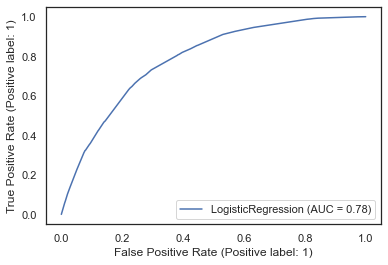

In [64]:
# Evaluation

#def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    #print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    #print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    #print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    #print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    #print('\n ROC Curve : \n ')
    #sns.set_style('white')
    #plot_roc_curve(model,x_test,y_actual)
    #plt.show()
    
#compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

# Optimization

# Handling Class Imbalance
Imbalanced classes are a common problem in ML classification. To solve the issue of class imbalance, we upsample the minority class because most ML models work better when both classes are about equal. This reduces errors and maximizes accuracy

In [26]:
#to upsample the minority class
ros=RandomOverSampler()

X_ros, y_ros=ros.fit_resample(X,y)

y_ros.value_counts()

0    218334
1    218334
Name: Diabetes_binary, dtype: int64

In [27]:
X=X_ros
y=y_ros

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [29]:
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Model Building

In [31]:
input_ml_algo='LR'

In [32]:
#Select the algorith according to the input provided
def model_to_use(input_ml_algo):
    if input_ml_algo=='DT':
        model=DecisionTreeClassifier()
    elif input_ml_algo=='RF':
        model=RandomForestClassifier()
    elif input_ml_algo=='XGBC':
        model=XGBClassifier()
    elif input_ml_algo=='LGBMC':
        model=LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    return model

In [63]:
model=model_to_use('RF')
model

RandomForestClassifier()

In [64]:
#training the model
model.fit(X_train, y_train)
model

RandomForestClassifier()

In [65]:
y_pred=model.predict(X_test)

#predict probability for test dataset
y_pred_prod=model.predict_proba(X_test)
y_pred_prod=[x[1]for x in y_pred_prod]    #the 1 here is us finding the probability of the person being positive. 
#if it was the other way(negative), we use index [0]. 
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

Y predicted :  [0 0 1 ... 1 1 0]
Y probability predicted :  [0.3974859491776981, 0.3974859491776981, 0.7836576413495595, 0.7836576413495595, 0.007738299500416037]



 Accuracy Score : 
  0.7142159220158625

 AUC Score : 
  0.7142167964767012

 Confusion Matrix : 
  [[45951 19554]
 [17884 47612]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.72      0.70      0.71     65505
           1       0.71      0.73      0.72     65496

    accuracy                           0.71    131001
   macro avg       0.71      0.71      0.71    131001
weighted avg       0.71      0.71      0.71    131001


 ROC Curve : 
 


C:\Users\opemi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


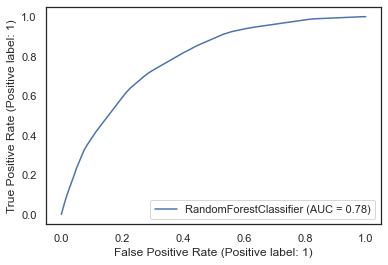

In [66]:
def compute_evaluation_metric(model,x_test,y_actual,y_predicted,y_predicted_prob):
    print('\n Accuracy Score : \n ',accuracy_score(y_actual,y_predicted))
    print('\n AUC Score : \n ',roc_auc_score(y_actual,y_predicted))
    print('\n Confusion Matrix : \n ',confusion_matrix(y_actual,y_predicted))
    print('\n Classification Report : \n ',classification_report(y_actual,y_predicted))
    
    print('\n ROC Curve : \n ')
    sns.set_style('white')
    plot_roc_curve(model,x_test,y_actual)
    plt.show()
    
compute_evaluation_metric(model,X_test,y_test,y_pred,y_pred_prod)

In [66]:
#X_ros[0]

array([ 2.32912057,  0.19692156,  0.22686264,  1.15368814, -1.76281393,
        0.48208665])

In [67]:
#def classification_model(X,y):
    
   # X=scaler.fit_transform(X)
    
    #split the dataset into the training set and test set
    X_train, X_test, y_train,y_test=train_test_split(X_ros,y_ros,test_size=0.3,random_state=0)
    
    #training the model:
 #   model.fit(X_train,y_train)
    
    #predict class for test dataset
  #  y_pred=model.predict(X_test)
    
    #predict probability for the test dataset
   # y_pred_prod=model.predict_proba(X_test)
   # y_pred_prod=[x[1] for x in y_pred_prod]
    
    #complete Evaluation Metric
#    compute_evaluation_metric(model, X_test,y_test,y_pred,y_pred_prod)
    
 #   return model


 Accuracy Score : 
  0.7164525461637697

 AUC Score : 
  0.7164787627461623

 Confusion Matrix : 
  [[46247 19397]
 [17748 47609]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.72      0.70      0.71     65644
           1       0.71      0.73      0.72     65357

    accuracy                           0.72    131001
   macro avg       0.72      0.72      0.72    131001
weighted avg       0.72      0.72      0.72    131001


 ROC Curve : 
 


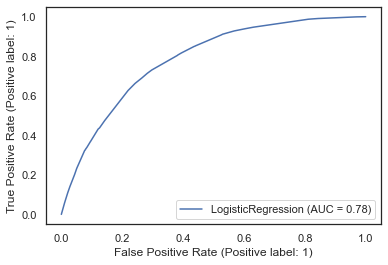

LogisticRegression()

In [68]:
#classification_model(X_ros,y_ros)

# Hyper Parameter Tuning


In [69]:
param_grid_decision_tree={'criterion':['gini','entropy'],
                         'max_depth':[10,15,20,30,40,50],
                         'min_samples_leaf':[1,2,5]}

#Define the parameters grid for random forest
param_grid_random_forest={'max_depth': [10,20,40],
                         'n_estimators': [100,200,300],
                         'min_samples_leaf': [1,2,5]}

#Define the parameters grid for XGBoost
param_grid_xgb={'min_child_weight': [1,5,10],
               'gamma': [0,1],
               'max_depth': [5,10],
               'learning_rate': [0.05,0.1]}

#Define the parameters grid for LGBM
param_grid_lgbm={'n_estimator':[100,200],
                'num_leaves': [256,128],
                'max_depth':[5,8,10],
                'learning_rate': [0.05,0.1]}

In [59]:
def param(input_ml_algo):
    if input_ml_algo=='DT':
        model=DecisionTreeClassifier()
        param_grid=param_grid_decision_tree
    elif input_ml_algo=='RF':
        model=RandomForestClassifier()
        param_grid=param_grid_random_forest
    elif input_ml_algo=='XGBC':
        model=XGBClassifier()
        param_grid=param_grid_xgb
    elif input_ml_algo=='LGBMC':
        model=LGBMClassifier()
        param_grid=param_grid_lgbm
    return param_grid

In [71]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [72]:
#to check model parameters
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [73]:
grid=GridSearchCV(model,param_grid_decision_tree,refit=True,verbose=3, n_jobs=-1)

#fit the model for grid search
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


ValueError: Invalid parameter criterion for estimator LogisticRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
#to check for the best parameters
grid.best_params_

In [71]:
#to predict..
y_pred=grid.predict(X_test)

#predict probability for test dataset
y_pred_prod=grid.predict_proba(X_test)
y_pred_prod=[x[0] for x in y_pred_prod]
print('Y predicted : ',y_pred)
print('Y probability predicted : ',y_pred_prod[:5])

NameError: name 'grid' is not defined


 Accuracy Score : 
  0.8609140124040786

 AUC Score : 
  0.5

 Confusion Matrix : 
  [[65519     0]
 [10585     0]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.86      1.00      0.93     65519
           1       0.00      0.00      0.00     10585

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104


 ROC Curve : 
 


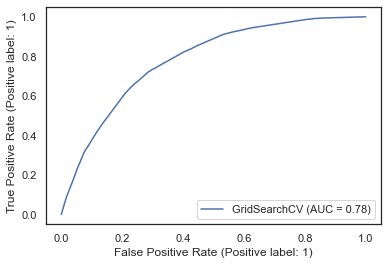

In [59]:
compute_evaluation_metric(grid, X_test, y_test,y_pred,y_pred_prod)

In [67]:
import pickle

In [68]:
# to save model to disk
pickle.dump(model, open('class_model.pkl','wb'))

pickle.dump(scaler, open('scaler2.pkl','wb'))

# Taking to Streamlit

In [78]:
print('\N{rain}')

⛆


In [79]:
#!pip install emoji

  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170280 sha256=3b9976f2099c895556c70b907d197913468eba3efccf67d4c749d3e094336f73
  Stored in directory: c:\users\opemi\appdata\local\pip\cache\wheels\7d\09\45\1ad33b3ac1e05d07355a3c81fe56c89837774fdb6665574765
Successfully built emoji


In [69]:
%%writefile DiabetesApp.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image

st.write("""
# DIABETES STATUS PREDICTION APP
""")
image=Image.open('DiabetesImg.jpg')
st.image(image, caption='Medical photo',width=500)

model=pickle.load(open('class_model.pkl','rb'))

scaler=pickle.load(open('scaler2.pkl','rb'))

st.sidebar.header('User Input Parameters')

def user_input_features():
    GenHlths=st.sidebar.selectbox('Health Rating',('Excellent','Good','Stable','Bad','Critical'))
    if GenHlths=='Excellent':
        GenHlth=5
    if GenHlths=='Good':
        GenHlth=4
    if GenHlths=='Stable':
        GenHlth=3
    if GenHlths=='Bad':
        GenHlth=2
    else:
        GenHlth=1
    CholCheck=st.selectbox('Cholestrol Level',('High','Low'))
    if CholCheck=='High':
        CholCheck=1
    else:
        CholCheck=0
        
    HighBP=st.sidebar.selectbox('Blood Pressure Level',('High','Low'))
    if HighBP=='High':
        HighBP=1
    else:
        HighBP=0
        
    AnyHealthcare=st.selectbox('Do You Have a Health Care Plan',('Yes','No'))
    if AnyHealthcare=='Yes':
        AnyHealthcare=1
    else:
        AnyHealthcare=0
        
    PhysActivity=st.selectbox('Do You Engage In Regular Physical Activity',('Yes','No'))
    if PhysActivity=='Yes':
        PhysActivity=1
    else:
        PhysActivity=0
        
    Veggies=st.selectbox('Do You Take Vegetables',('Yes','No'))
    if Veggies=='Yes':
        Veggies=1
    else:
        Veggies=0 
        
    data={'GenHlth':GenHlth,
         'CholCheck': CholCheck,
         'HighBP':HighBP,
         'AnyHealthcare':AnyHealthcare,
         'PhysActivity':PhysActivity,
         'Veggies':Veggies}
    
    features = pd.DataFrame(data,index=[0])
    return features

input_dfs=user_input_features()
input_df=scaler.transform(input_dfs)

st.dataframe(input_dfs)
    
if st.button('PREDICT'):
    y_out=model.predict(input_df)
    if y_out[0]==1:
        st.write(f' You have a high risk of Diabetes')
    else:
        st.write(f' You are unlikely to be at risk of Diabetes')


Overwriting DiabetesApp.py


In [70]:
!streamlit run DiabetesApp.py

^C
